In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

loss: 0.446975 step 0
loss: 0.123354 step 100
loss: 0.0326732 step 200
loss: 0.00472629 step 300
loss: 0.00149279 step 400
loss: 0.00102176 step 500
loss: 0.000778708 step 600
loss: 0.000630049 step 700
loss: 0.000541114 step 800
loss: 0.000488677 step 900
loss: 0.000457868 step 1000
loss: 0.000439594 step 1100
loss: 0.000428475 step 1200
loss: 0.000421407 step 1300
loss: 0.000416629 step 1400
loss: 0.000413157 step 1500
loss: 0.00041044 step 1600
loss: 0.000408176 step 1700
loss: 0.000406196 step 1800
loss: 0.000404408 step 1900


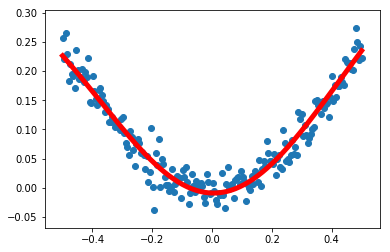

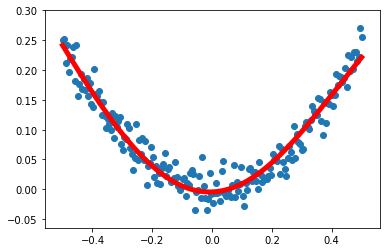

In [8]:
#sample
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis] # 200x1
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

# place holders
x = tf.placeholder(tf.float32, [None, 1])# any row x1
y = tf.placeholder(tf.float32, [None, 1])# any row x1

# simple nn 1 ~ 10 ~ 1
#hidden layer
Weights_L1 = tf.Variable(tf.random_normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1 # 200x1 * 1x10 = 200x10 + 1x10?
L1 = tf.nn.tanh(Wx_plus_b_L1)

#output layer
Weights_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2 # 200x10 * 10x1 = 200x10 + 1x1?
prediction = tf.nn.tanh(Wx_plus_b_L2)

# cost function
loss = tf.reduce_mean(tf.square(y - prediction))

losses = []
# optimizer algorithm
optimizer = tf.train.GradientDescentOptimizer(0.1)

train_step = optimizer.minimize(loss)

init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        sess.run(train_step, feed_dict={x:x_data, y: y_data})
        lost = sess.run(loss, feed_dict={x:x_data, y: y_data})
        losses.append(loss)
        if i%100==0 :
            print("loss:", lost ,"step", i)
    #prediction
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value, 'r-', lw=5)
    plt.show()
    

In [10]:
# plot the cost
plt.figure()
plt.plot(np.squeeze(losses))
plt.ylabel('cost')
plt.xlabel('epochs (per 100)')
plt.title("Learning rate = 0.2")
plt.show()

ValueError: setting an array element with a sequence.